## Convolutional Neural Network

En el ejercicio siguiente se va a realizar un modelo de clasificación para el dataset MNIST. Para ello, vamos a diseñar una red neuronal convolucional con 2 capas usando el framework KERAS. La red que vamos a diseñar realizará lo siguiente:

- Vamos a utilizar dos capas convolucionales con filtros de kernel de tamaño 3 (3x3)
- La función de activación será tipo RELU
- Por último, vamos a "aplastar" la salida de las capas convolucionales para conectarlo con una última capa sencilla
- Una capa sencilla de salida con los 10 números posibles

Como ya sabemos, los datos son imágenes de 28x28 píxeles y existen 10 números a clasificar, del 0 al 9. Puesto que el valor de los píxeles está en escala de grises del 0 al 255, normalizamos de 0 a 1.

In [12]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

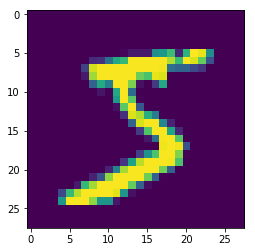

In [15]:
import matplotlib.pyplot as plt
# Dibujamos una muetra
plt.imshow(X_train[0])

Esta vez de añadir una capa de "Flattern" en la red neuronal, vamos a realizar un reshape de los datos de entrada para que vayan al modelo

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
from keras.utils import to_categorical

# Realizamos un one-hot encode de la variable objetivo
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Creamos el modelo

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
# creación del modelo
model = Sequential()
# Añadimos capas
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())

model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [13]:
# Compilamos el modelo para calcular su acierto
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Lo entrenamos
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 81s 1ms/step - loss: 0.5512 - acc: 0.9287 - val_loss: 0.0906 - val_acc: 0.9731
Epoch 2/3
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0672 - acc: 0.9793 - val_loss: 0.0868 - val_acc: 0.9755
Epoch 3/3
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0479 - acc: 0.9848 - val_loss: 0.0941 - val_acc: 0.9761


Realizamos unas cuantas predicciones y finalmente calculamos la precisión del modelo

In [ ]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [15]:
# Primeras 4 muestras
model.predict(X_test[:4])

array([[5.5877317e-11, 6.7810991e-14, 7.9901113e-08, 1.9099494e-05,
        2.8786284e-11, 6.1227252e-16, 2.3362225e-19, 9.9998081e-01,
        2.8215255e-10, 5.8751720e-10],
       [2.9965889e-08, 2.0714901e-06, 9.9999404e-01, 2.5926933e-08,
        1.7859257e-11, 4.5565342e-13, 3.6641204e-06, 3.4743731e-12,
        9.3338521e-08, 1.9464707e-14],
       [2.7067522e-11, 9.9998558e-01, 2.8802160e-07, 3.9166914e-10,
        1.0348314e-06, 3.4422410e-08, 1.3499035e-10, 3.8869268e-12,
        1.3055565e-05, 1.5171940e-09],
       [1.0000000e+00, 3.6393348e-16, 4.8376270e-10, 1.2468481e-12,
        2.4061558e-12, 3.3391786e-11, 1.6578775e-09, 1.4153434e-11,
        8.3605470e-11, 1.2963284e-09]], dtype=float32)

In [16]:
# Primeros 4 valores
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 5s 452us/step


[0.0940950254870404, 0.9761]